In [2]:
import kagglehub

# Download latest version of dataset
path = kagglehub.dataset_download("alessiocorrado99/animals10")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'animals10' dataset.
Path to dataset files: /kaggle/input/animals10


In [3]:
#Verificação do Diretório
import os
DATA_DIR = path + '/raw-img'
print(f"Diretório alvo: {DATA_DIR}")
print(f"Conteúdo: {os.listdir(DATA_DIR)}")

Diretório alvo: /kaggle/input/animals10/raw-img
Conteúdo: ['cavallo', 'pecora', 'elefante', 'gatto', 'scoiattolo', 'gallina', 'ragno', 'mucca', 'cane', 'farfalla']


Pré-processamento das imagens:

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

#Configurações
BATCH_SIZE = 16
IMG_SIZE = (224, 224) # Tamanho padrão para redes pré-treinadas (MobileNet, ResNet)

preprocess_func = tf.keras.applications.mobilenet_v2.preprocess_input

datagen = ImageDataGenerator(
    validation_split=0.2,
    preprocessing_function=preprocess_func
)

train_ds = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='training',
    seed=123
)

val_ds = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='validation',
    seed=123
)


Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


Preparando modelo (MobileNetV2):

In [5]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMG_SIZE + (3,),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

inputs = tf.keras.Input(shape=IMG_SIZE + (3,))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs, outputs)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [6]:
checkpoint_filepath = '/content/melhor_modelo.keras'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[model_checkpoint_callback]
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 278s 198ms/step - accuracy: 0.8774 - loss: 0.4264 - val_accuracy: 0.9549 - val_loss: 0.1484
Epoch 2/10
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 82s 63ms/step - accuracy: 0.9559 - loss: 0.1440 - val_accuracy: 0.9606 - val_loss: 0.1320
Epoch 3/10
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 81s 62ms/step - accuracy: 0.9629 - loss: 0.1164 - val_accuracy: 0.9601 - val_loss: 0.1382
Epoch 4/10
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 82s 62ms/step - accuracy: 0.9706 - loss: 0.0907 - val_accuracy: 0.9608 - val_loss: 0.1345
Epoch 5/10
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 82s 62ms/step - accuracy: 0.9706 - loss: 0.0952 - val_accuracy: 0.9610 - val_loss: 0.1426
Epoch 6/10
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 82s 63ms/step - accuracy: 0.9746 - loss: 0.0819 - val_accuracy: 0.9589 - val_loss: 0.1397
Epoch 7/10
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 81s 62ms/step - accuracy: 0.9724 - loss: 0.0801 - val_accuracy: 0.9602 - val_loss: 0.1462
Epoch 8/10
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 80s 61ms/step - accuracy: 0.9746

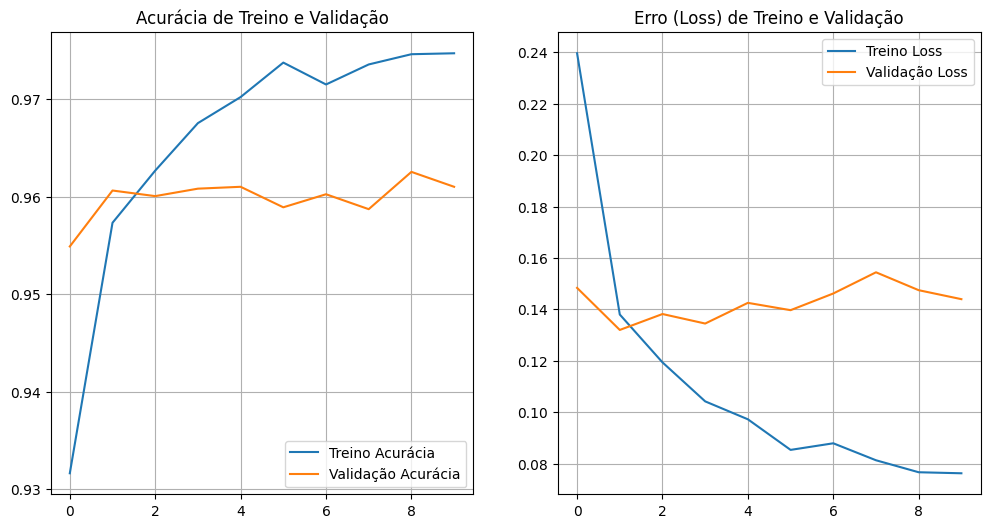

In [7]:
import matplotlib.pyplot as plt

# Extrair dados do histórico
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

# Plotar
plt.figure(figsize=(12, 6))

# Gráfico de Acurácia
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Treino Acurácia')
plt.plot(epochs_range, val_acc, label='Validação Acurácia')
plt.legend(loc='lower right')
plt.title('Acurácia de Treino e Validação')
plt.grid(True)

# Gráfico de Erro (Loss)
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Treino Loss')
plt.plot(epochs_range, val_loss, label='Validação Loss')
plt.legend(loc='upper right')
plt.title('Erro (Loss) de Treino e Validação')
plt.grid(True)

plt.show()

Classes do modelo: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']

Faça upload de uma imagem do seu computador:


Saving Cat_November_2010-1a.jpg to Cat_November_2010-1a.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


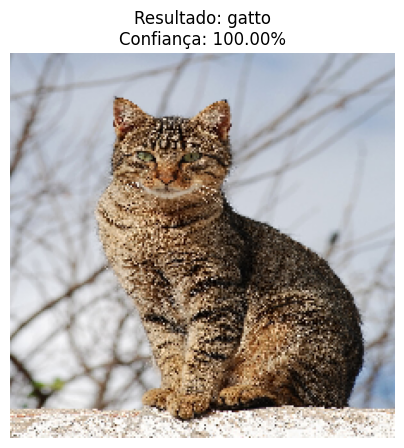

In [8]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

class_names = list(train_ds.class_indices.keys())
print("Classes do modelo:", class_names)

print("\nFaça upload de uma imagem do seu computador:")
uploaded = files.upload()

for fn in uploaded.keys():
  try:
    path = fn
    # Carrega a imagem já no tamanho certo (224x224)
    img = image.load_img(path, target_size=(224, 224))

    # Converte para array numpy
    img_array = image.img_to_array(img)

    # Adiciona a dimensão do batch
    img_array = np.expand_dims(img_array, axis=0)

    # Pré-processamento
    img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

    # Prediz
    predictions = model.predict(img_array)
    class_idx = np.argmax(predictions[0])
    confidence = 100 * np.max(predictions)

    # Mostrar
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Resultado: {class_names[class_idx]}\nConfiança: {confidence:.2f}%")
    plt.show()

  except Exception as e:
    print(f"Erro ao processar a imagem {fn}: {e}")

Seção de Métricas

In [9]:
import numpy as np

# Obter nomes das classes
class_names = list(train_ds.class_indices.keys())

# Quantidade total de imagens de validação
val_steps = val_ds.samples // val_ds.batch_size

# Obter previsões e labels verdadeiros
y_true = []
y_pred = []

for i in range(val_steps):
    x_batch, y_batch = next(val_ds)
    preds = model.predict(x_batch)
    y_true.extend(y_batch)
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━

In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=class_names))


              precision    recall  f1-score   support

        cane       0.96      0.97      0.96       972
     cavallo       0.94      0.96      0.95       524
    elefante       0.97      0.96      0.97       289
    farfalla       0.96      0.97      0.97       422
     gallina       0.96      0.99      0.97       619
       gatto       0.94      0.93      0.93       333
       mucca       0.92      0.93      0.92       373
      pecora       0.96      0.90      0.93       364
       ragno       0.99      0.98      0.99       964
  scoiattolo       0.98      0.97      0.97       372

    accuracy                           0.96      5232
   macro avg       0.96      0.95      0.96      5232
weighted avg       0.96      0.96      0.96      5232



In [11]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
cm


array([[942,   3,   0,   1,   6,  15,   2,   2,   0,   1],
       [ 11, 502,   1,   0,   0,   0,   9,   1,   0,   0],
       [  1,   2, 277,   0,   0,   0,   3,   4,   0,   2],
       [  0,   1,   0, 411,   2,   1,   0,   0,   7,   0],
       [  3,   2,   1,   1, 612,   0,   0,   0,   0,   0],
       [ 15,   0,   1,   1,   3, 309,   0,   0,   0,   4],
       [  3,  16,   2,   0,   0,   0, 346,   6,   0,   0],
       [  2,   8,   3,   0,   7,   1,  17, 326,   0,   0],
       [  1,   1,   0,  14,   2,   0,   0,   0, 944,   2],
       [  4,   0,   0,   1,   5,   2,   0,   0,   1, 359]])

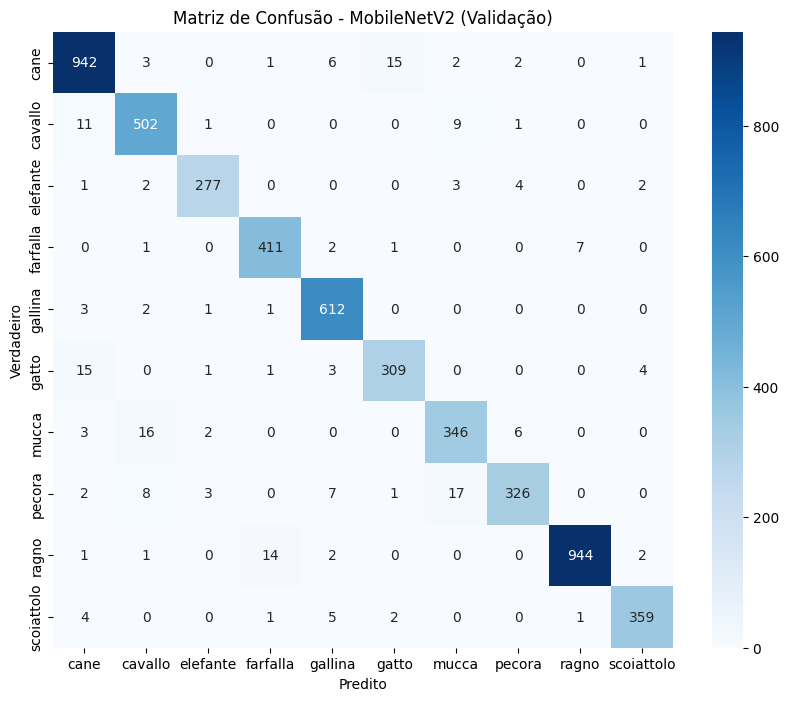

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)

plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão - MobileNetV2 (Validação)")
plt.show()


In [13]:
import pandas as pd

report = classification_report(
    y_true,
    y_pred,
    target_names=class_names,
    output_dict=True
)

df_report = pd.DataFrame(report).transpose()
df_report


,precision,recall,f1-score,support
cane,0.959267,0.969136,0.964176,972.000000
cavallo,0.938318,0.958015,0.948064,524.000000
elefante,0.971930,0.958478,0.965157,289.000000
farfalla,0.958042,0.973934,0.965922,422.000000
gallina,0.960754,0.988691,0.974522,619.000000
gatto,0.942073,0.927928,0.934947,333.000000
mucca,0.917772,0.927614,0.922667,373.000000
pecora,0.961652,0.895604,0.927454,364.000000
ragno,0.991597,0.979253,0.985386,964.000000
scoiattolo,0.975543,0.965054,0.970270,372.000000
